# Roteiro Experimental para o experimento "Balança de corrente"

Você deve responder as perguntas abaixo preenchendo as células com texto ( _Markdown_ ) quando solicitado a explicar alguma coisa e usar as células de codigo ( _Code_ ) quando for solicitado cálculos, valores, estimativas e gráficos. Quando usar células de código use o símbolo "#" para comentar o que foi feito sempre que julgar necessário.

**Lembre-se de seguir o método de análise que lhe foi sorteado pelo professor!**

## 0. Identificação

### nome completo:
Guilherme Fortes Evangelista
### RA:
21062515
### e-mail institucional:
g.fortes@aluno.ufabc.edu.br

## 1. Objetivos do experimento

Descreva na célula abaixo em um único parágrafo qual é o seu entendimento sobre os objetivos deste experimento (não se esqueça de acionar o modo _Markdown_ ):

## 2. Descreva sucintamente a física do experimento e os resultados esperados 

Use as fórmulas que julgar necessárias. Procure ser sucinto ($\sim$2 parágrafos).

## 3. Descreva o arranjo experimental

Liste os equipamentos e materiais usados no experimento, bem como a montagem dos diversos componentes.

## 4. Descreva o procedimento experimental

Como foram foram usados os equipamentos, quais parâmetros foram variados e de que forma, quais dados foram tomados e as tabelas de dados.

## 5. Faça um gráfico dos dados "brutos"

Por "brutos" entenda "assim como foram anotados". Neste experimento são esperados dois gráficos deste tipo. (Use _Code cell_ )

F (N)  I (mA)  uF (N)  uI (mA)
0   0.01   1.207   0.005    0.014
1   0.02   1.690   0.005    0.016
2   0.03   2.278   0.005    0.018
3   0.04   2.623   0.005    0.019
4   0.05   3.424   0.005    0.022
5   0.06   3.933   0.005    0.024
6   0.07   4.497   0.005    0.026
7   0.08   5.198   0.005    0.028
8   0.09   5.777   0.005    0.030 



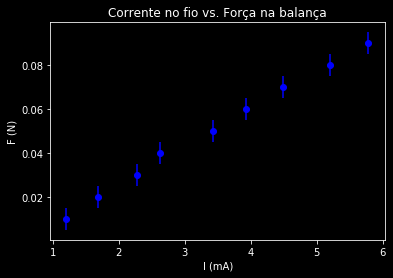

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
from matplotlib import pyplot as plt

#Dica: aqui é bom já começar definindo os vetores usando o np.array, pq
#é o formato utilizado para cálculos em python

I = np.array([1.207,1.690,2.278,2.623,3.424,3.933,4.497,5.198,5.777])
uI = np.array([0.014,0.016,0.018,0.019,0.022,0.024,0.026,0.028,0.030])
F1 = np.array([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09])
uF1 = np.array([0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002])
dados1 = {'I (mA)' : I, 'F (N)' : F1, 'uI (mA)': uI, 'uF (N)': uF1}
df1 = pd.DataFrame(dados1)
print(df1, "\n")

plt.figure()
plt.errorbar(df1['I (mA)'], df1['F (N)'], df1['uF (N)'], df1['uI (mA)'],'ob')
plt.title("Corrente no fio vs. Força na balança")
plt.xlabel(df1['I (mA)'].name)
plt.ylabel("F (N)")
plt.show()

B (mT)  F (N)  uB (mT)  uF (N)
0      52   0.01        2   0.005
1      97   0.02        2   0.005
2     121   0.03        2   0.005
3     150   0.04        2   0.005
4     207   0.05        2   0.005
5     241   0.06        2   0.005
6     288   0.07        2   0.005
7     319   0.08        2   0.005
8     346   0.09        2   0.005 



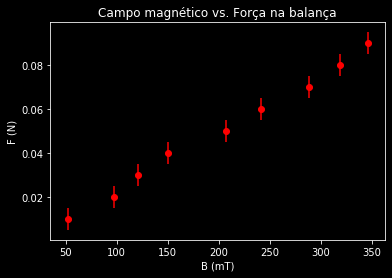

In [2]:
#Dica: dá pra mostrar quantas saídas por célula vc quiser usando o comando print,
#mas coisas que são exibidas sem o print só pode uma por célula

B = np.array([52,97,121,150,207,241,288,319,346])
uB = np.array([2,2,2,2,2,2,2,2,2])
F2 = np.array([0.01,0.02,0.030,0.04,0.05,0.06,0.07,0.08,0.09])
uF2 = np.array([0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002])
dados2 = {'B (mT)' : B, 'F (N)' : F2, 'uB (mT)': uB, 'uF (N)': uF2}
df2 = pd.DataFrame(dados2)
print(df2, "\n")

plt.figure() 
plt.errorbar(df2['B (mT)'], df2['F (N)'], df2['uF (N)'], df2['uB (mT)'],'or')
plt.title("Campo magnético vs. Força na balança")
plt.xlabel(df2['B (mT)'].name)
plt.ylabel("F (N)")
plt.show()

## 6. Faça a transferência de incertezas da _variável x_ para a _variável y_.

Neste experimento há dois conjuntos de dados a serem analisados. Seguindo o _template_ de _notebook_ apresentado no _moodle_ responda na próxima célula ( _markdown_ ) se as incertezas da variável correspondente ao _eixo x_ precisam ser transferidas para a variável correspondente ao _eixo y_ em cada um dos conjuntos de dados. Justifique a sua resposta com argumentos _semi-quantitativos_. Se for necessária a transferência adicione as células ( _code_ ) necessárias à operação de transferência (lembrete: para adicionar uma célula nova clique em "+" no menu do _notebook_ e clique nas flechas se precisar reposicionar células) 

In [3]:
def linear1(I, a1, b1):
    return a1*I + b1

def linear2(B, a2, b2):
    return a2*B+b2

coef1, cov_pars1 = curve_fit(linear1, I, F1)
coef2, cov_pars2 = curve_fit(linear2, B, F2)

print("coef. angular 1 =", coef1[0], "; coef. linear 1 =", coef1[1])
print("coef. angular 2 =", coef2[0], "; coef. linear 2 =", coef2[1])

coef. angular 1 = 0.017304649598422095 ; coef. linear 1 = -0.008887722595384423
coef. angular 2 = 0.000263127350937045 ; coef. linear 2 = -0.0032394340317263358


As incertezas na corrente $I$ e na intensidade do campo magnético $B$ são da mesma ordem de grandeza que a incerteza na força $F$ e ao multiplicar as incertezas de $I$ e $B$ pelos seus coeficientes angulares, as correções nas incertezas de $F$ são desprezíveis.

## 7. Faça os ajustes de reta minimizando $\chi^2_{red}$
Faça o ajuste de retas usando as incertezas da variável correspondente ao _eixo y_ (após a transferência das incertezas em x). Imprima os resultados dos parâmetros ajustados no formato $a\pm\sigma_a$ com os algarismos significativos apropriados.

In [4]:
np.set_printoptions(precision=9)

coef1u, cov_pars1u = curve_fit(linear1, I, F1, sigma=uF1)
coef2u, cov_pars2u = curve_fit(linear2, B, F2, sigma=uF2)

a1 = np.round(coef1u[0],5)
b1 = np.round(coef1u[1],4)
a2 = np.round(coef2u[0],7)
b2 = np.round(coef2u[1],4)
ua1 = np.round(np.sqrt(cov_pars1u[0][0]),5)
ub1 = np.round(np.sqrt(cov_pars1u[1][1]),4)
ua2 = np.round(np.sqrt(cov_pars2u[0][0]),7)
ub2 = np.round(np.sqrt(cov_pars2u[1][1]),4)

print("a1 =", a1,"+/-",ua1,"; b1 =", b1,"+/-",ub1)
print("a2 =", a2,"+/-",ua2,"; b2 =", b2,"+/-",ub2)

a1 = 0.0173 +/- 0.00039 ; b1 = -0.0089 +/- 0.0014
a2 = 0.0002631 +/- 7.6e-06 ; b2 = -0.0032 +/- 0.0017


## 8. Determine a qualidade dos ajustes

Na próxima célula ( _code_ ) calule o $\chi^2_{red}$ de ambos os ajustes. Na célula seguinte ( _code_ novamente) faça um gráfico de resíduos e na terceira célula a seguir ( _markdown_ ) discuta a qualidade do ajuste.

In [5]:
F1hat = np.polyval(coef1u, I)
print((F1hat-F1)/uF1)
chi_squared = np.sum(((F1hat - F1)/uF1) ** 2)
print(chi_squared)
chi2_red = chi_squared/(len(I)-2)
print("chi: ", chi2_red)

F2hat = np.polyval(coef2u, B)
print((F2hat-F2)/uF2)
chi_squared2 = np.sum(((F2hat - F2)/uF2) ** 2)
print(chi_squared2)
chi2_red2 = chi_squared2/(len(B)-2)
print("chi: ", chi2_red2)


[ 0.399797901  0.071427051  0.106453843 -0.699525336  0.072679528
 -0.165707144 -0.213742671  0.212369201  0.216247623]
0.8358991145740895
chi:  0.11941415922486993
[ 0.088637645  0.456783803 -0.280204912 -0.754066277  0.245585523
  0.034851509  0.508248607  0.139638183 -0.439474122]
1.39611866846186
chi:  0.19944552406598


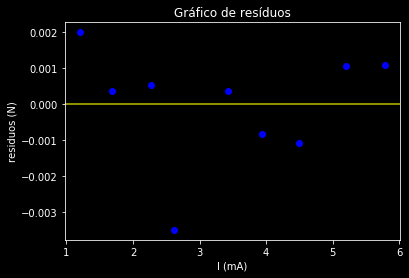

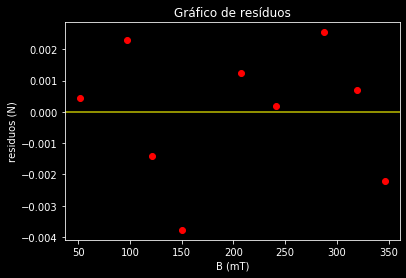

In [6]:
resid = F1hat - F1
plt.plot(I, resid, 'ob')
plt.title("Gráfico de resíduos")
plt.xlabel("I (mA)")
plt.ylabel("residuos (N)")
plt.axhline(y=0, color='y', linestyle='-')
plt.show()

resid2 = F2hat - F2
plt.plot(B, resid2, 'or')
plt.title("Gráfico de resíduos")
plt.xlabel("B (mT)")
plt.ylabel("residuos (N)")
plt.axhline(y=0, color='y', linestyle='-')
plt.show()

## 9. Interprete os resultados dos ajustes

Os ajustes lineares são do tipo $y = ax + b$. Qual é o significado físico dos parâmetros $a$ e $b$? Os valores dos parâmetros ajustados (consideradas as incertezas) são compatíveis com o esperado?

## 10. Obtenha valores experimentais a partir dos ajustes

### 13.1. Calcule L (primeira versão)

Do ajuste aos dados de variação de corrente (com campo fixo) obtenha o valor do comprimento do fio $L$ imerso no campo magnético e sua incerteza a partir do coeficiente angular do ajuste. Propague a incerteza vinda do ajuste.


### 13.2. Calcule L (segunda versão)

Do ajuste aos dados de variação de campo magnético (com corrente fixa) obtenha o valor do comprimento do fio $L$ imerso no campo magnético e sua incerteza a partir do coeficiente angular do ajuste. Propague a incerteza vinda do ajuste.


### 13.3. Compare os resultados

Compare os resultados de 13.1 e 13.2 e à luz das incerteza argumente se são compatíveis entre si e compatíveis com o valor de $L$ medido diretamente no arranjo experimental.